In [1]:
import numpy as np      
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [2]:
# pd.options.display.max_columns=100 # To see the hidden columns in dataframe

#### **Load Data**

In [3]:
# Training values 
training_values = pd.read_csv('data/Training set values.csv')
training_values.shape

(59400, 40)

In [4]:
# Training labels 
training_labels = pd.read_csv('data/Training set labels.csv') 
training_labels.shape

(59400, 2)

In [5]:
# set id as an index to training values
training_values.set_index('id',inplace=True) 

In [6]:
# set id as an index to train labels
training_labels.set_index('id',inplace=True) 

In [7]:
# Concatinate both training values and training labels together

training_data = pd.concat([training_values, training_labels], axis=1)
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [8]:
# Testing data 

testing_data = pd.read_csv("data/Test set values.csv")
testing_data.set_index('id',inplace=True) 
testing_data.shape

(14850, 39)

In [9]:
# Concatinate training_data and testing_data 

df_all = pd.concat([training_data, testing_data]).reset_index(drop=True)
df = df_all.copy()
df.shape

(74250, 40)

In [10]:
# Set Index for df
df.reset_index(inplace=True) 

###


### **Explore The Features & Drop unwanted columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [12]:
# Check null values in the training data (training_values + training labelss
training_data.isna().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
water_quality                0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
quantity                     0
quality_group                0
extraction_type              0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
extraction_type_group        0
amount_tsh                   0
construction_year            0
date_recorded                0
recorded_by                  0
population                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region  

In [13]:
# Check the target classes 
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### **There are some columns with similar data. We have to clear and rearrange them first.** 

**Check below features**
* scheme_management
* management



In [14]:
# Values in 'scheme_manascheme_managementgement'
training_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [15]:
# Values in management 
training_data.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [16]:
training_data.scheme_management.isna().sum()

3877

In [17]:
training_data.management.isna().sum()

0

**Both columns has same kind of data. But in 'scheme_management' column, there are 3877 missing values. So it is better to keep 'management' and drop the 'scheme_management'**

In [18]:
df = df.drop('scheme_management', axis = 1)

**Check Below Columns**
* Quantity
* Quantity Group

In [19]:
training_data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [20]:
training_data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

**Both above 2 columns ('quantity' & 'quantity_group') have same values. So, we can drop one columns.**

In [21]:
df = df.drop('quantity_group', axis = 1)

**Check below columns**
* source
* source_types

In [22]:
training_data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [23]:
training_data.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

**Both columns have same kind of values and 'source' has more data. So drop 'source_type' column**

In [24]:
df = df.drop('source_type', axis = 1)

#### **Check below groups**
* water_quality
* quality_group

In [25]:
training_data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [26]:
training_data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

**We can see that both columns have same kind of data and 'water_quality' has more values. So, drop the 'quality_group'**

In [27]:
df = df.drop('quality_group', axis = 1)

#### **Check below columns** 
* payment
* payment_types

In [28]:
training_data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [29]:
training_data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

**We can see that both have the same values. So we can drop one. We'll drop 'paymenent_type'**

In [30]:
df = df.drop('payment_type', axis = 1)

#### **Check below columns**
* extraction_type
* extraction_type_group

In [31]:
training_data.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [32]:
training_data.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

**We can see that both columns have same kind of values and 'extraction_type' has more unique vales. So we drop the 'extraction_type_group'**

In [33]:
df = df.drop('extraction_type_group', axis = 1)

#### **Check below columns**
* waterpoint_type
* waterpoint_type_group

In [34]:
training_data.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [35]:
training_data.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

**We can see that both columns contain same kind of data, but 'waterpoint_type' contains more unique data. So, we drop 'waterpoint_type_group'**

In [36]:
df = df.drop('waterpoint_type_group', axis = 1)

In [37]:
df.isna().sum().sort_values(ascending=False)

scheme_name              35258
status_group             14850
installer                 4532
funder                    4504
public_meeting            4155
permit                    3793
subvillage                 470
source_class                 0
source                       0
quantity                     0
water_quality                0
recorded_by                  0
management_group             0
management                   0
extraction_type_class        0
extraction_type              0
construction_year            0
waterpoint_type              0
payment                      0
index                        0
amount_tsh                   0
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
basin                        0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_rec

####

### **Filling missing values and Other Feature Engineering Tasks**

#### **Check 'recorded_by' column**

In [38]:
training_data['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

**This has only one value. So no effect from that column. We can drop it**

In [39]:
df = df.drop('recorded_by', axis = 1)

#### **Check 'installer' columns**

In [40]:
# Check for nulkl values in installer column\

training_data.installer.isna().sum()

3655

In [41]:
# Fill null values using 'missing'

df['installer'].fillna(value='missing',inplace=True)  
training_data['installer'].fillna(value='missing',inplace=True)  

In [42]:
training_data.installer.value_counts()

DWE                 17402
missing              3655
Government           1825
RWE                  1206
Commu                1060
                    ...  
MH Kapuya               1
GD&ID                   1
CHONJA CHARLES          1
CHRISTAN OUTRICH        1
EGYPT                   1
Name: installer, Length: 2146, dtype: int64

**There are many categorical values, but there are many error in recording the values like spelling mistakes kind of things. So we have to consider about those.**

**eg :**
* District Water Department , District water depar, Distric Water Department
* Central Government , Cental Governmen

**We have to make them correct**

In [43]:
df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [44]:
# Spelling mistakes 

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [45]:
#Most 30 common installers are listed

training_data.installer.value_counts().head(30) 

DWE                   17402
missing                3655
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Gover                   383
AMREF                   329
TWESA                   316
WU                      301
Dmdd                    287
ACRA                    278
World Vision            270
SEMA                    249
DW                      246
Name: installer, dtype: int64

In [46]:
# We take first 20 and plot to see the analysis

df_1 = training_data.loc[training_data['installer']== 'DWE']
df_2 = training_data.loc[training_data['installer']== 'missing']              
df_3 = training_data.loc[training_data['installer']== 'Government'] 
df_4 = training_data.loc[training_data['installer']== 'Community'] 
df_5 = training_data.loc[training_data['installer']== 'DANIDA'] 
df_6 = training_data.loc[training_data['installer']== 'RWE'] 
df_7 = training_data.loc[training_data['installer']== 'District council'] 
df_8 = training_data.loc[training_data['installer']== 'Central government']
df_9 = training_data.loc[training_data['installer']== 'KKKT'] 
df_10 = training_data.loc[training_data['installer']== 'HESAWA'] 
df_11 = training_data.loc[training_data['installer']== 'TCRS'] 
df_12 = training_data.loc[training_data['installer']== 'world vision'] 
df_13 = training_data.loc[training_data['installer']== 'CES'] 
df_14 = training_data.loc[training_data['installer']== 'Fini Water'] 
df_15 = training_data.loc[training_data['installer']== 'RC Church'] 
df_16 = training_data.loc[training_data['installer']== 'villagers']
df_17 = training_data.loc[training_data['installer']== 'LGA']
df_18 = training_data.loc[training_data['installer']== 'WEDECO']
df_19 = training_data.loc[training_data['installer']== 'Unicef']
df_20 = training_data.loc[training_data['installer']== 'AMREF']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17, df_18, df_19, df_20], ignore_index=True)

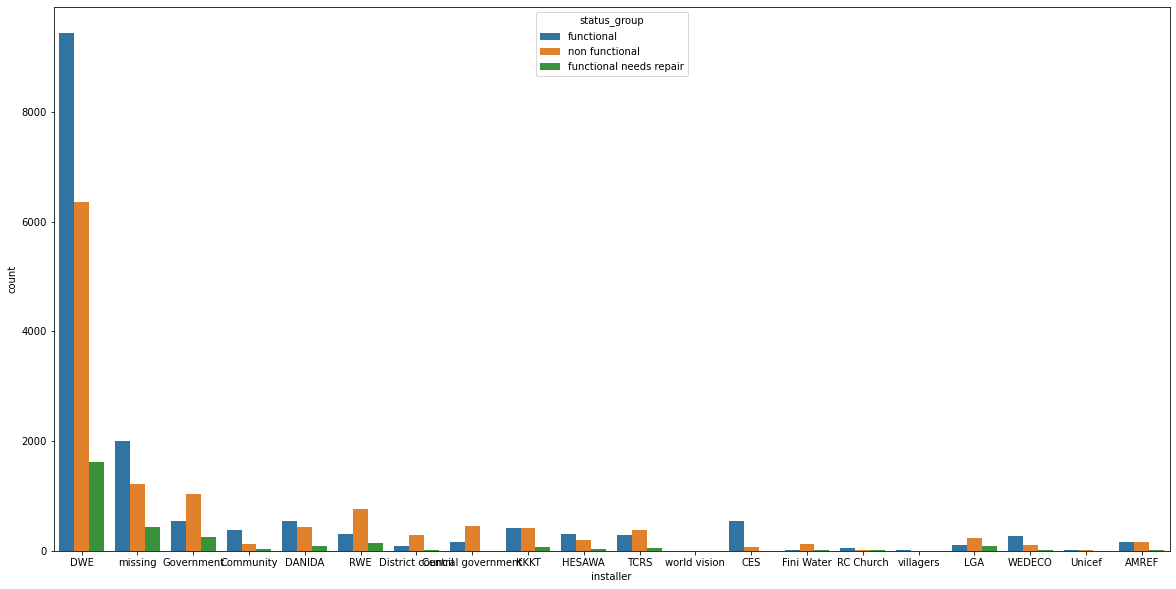

In [47]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

As there are so many unique values with low frequencies, we can combine them and make a another category. So, below 300, we can name them as 'others'

In [48]:
# Creating new column as installer_category to categorize installers 

df['installer_category'] = df['installer'] 

In [49]:
# 'installer_categories' are only above 300 

installer_categories = [
    'DWE',
    'missing',
    'Government',
    'Community',
    'DANIDA',
    'RWE',
    'District council', 
    'Central government',
    'KKKT',
    'HESAWA',
    'TCRS', 
    'world vision', 
    'Fini Water', 
    'RC Church',
    'villagers',
    'LGA',
    'WEDECO',
    'Unicef',
    'AMREF',
    'TWESA' ,
    'WU'   ,
    'Dmdd'  ,
    'ACRA',
    'SEMA',
    'DW' ,
    'Jaica'
]

df.loc[~df["installer_category"].isin(installer_categories), "installer_category"] = "Others"

In [50]:
df.installer_category.value_counts()

Others                25568
DWE                   21751
missing                4532
Government             3337
Community              2112
DANIDA                 1995
HESAWA                 1749
RWE                    1498
District council       1449
Central government     1359
KKKT                   1120
TCRS                    887
world vision            846
Fini Water              732
RC Church               586
villagers               514
LGA                     501
WEDECO                  496
Unicef                  421
AMREF                   398
TWESA                   395
WU                      377
Dmdd                    356
ACRA                    346
SEMA                    311
DW                      308
Jaica                   306
Name: installer_category, dtype: int64

In [51]:
# No need to have 'installer' column now. We can drop it 

df = df.drop('installer', axis = 1)

#### **Check 'funder' Column**

In [52]:
# Fill missing values with 'missing'

df['funder'].fillna(value='missing',inplace=True)
df['funder'].replace(to_replace = '0', value ='missing' , inplace=True)

In [53]:
training_data['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Elca                         1
Mwamama                      1
Villages                     1
Lusajo                       1
Plan Tanzania                1
Name: funder, Length: 1897, dtype: int64

In [54]:
training_data.funder.value_counts().head(20)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

**This is same as installer and have so  many unique values. So, get first 20 values and name others as 'others'**

In [55]:
# Only first 20 funded categories are selected and others named as 'others'

df['funder_categories'] = df['funder'] 

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_categories"].isin(c_fund), "funder_categories"] = "Others"

In [56]:
df['funder_categories'].value_counts()

Others                    38539
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Dwe                         605
Unknown                       5
Name: funder_categories, dtype: int64

In [57]:
# No need of 'funder' column now. We can drop it 

df = df.drop('funder', axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   longitude              74250 non-null  float64
 5   latitude               74250 non-null  float64
 6   wpt_name               74250 non-null  object 
 7   num_private            74250 non-null  int64  
 8   basin                  74250 non-null  object 
 9   subvillage             73780 non-null  object 
 10  region                 74250 non-null  object 
 11  region_code            74250 non-null  int64  
 12  district_code          74250 non-null  int64  
 13  lga                    74250 non-null  object 
 14  ward                   74250 non-null  object 
 15  po

#### **Check 'date_recorded' column**

**Most of the data were recorder in nearest years each other (like 2 years) we can ignore it and drop the column**

In [59]:
df = df.drop('date_recorded', axis = 1)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   longitude              74250 non-null  float64
 4   latitude               74250 non-null  float64
 5   wpt_name               74250 non-null  object 
 6   num_private            74250 non-null  int64  
 7   basin                  74250 non-null  object 
 8   subvillage             73780 non-null  object 
 9   region                 74250 non-null  object 
 10  region_code            74250 non-null  int64  
 11  district_code          74250 non-null  int64  
 12  lga                    74250 non-null  object 
 13  ward                   74250 non-null  object 
 14  population             74250 non-null  int64  
 15  pu

#### **Check 'num_private' column**

In [61]:
training_data.num_private.value_counts()

0      58643
6         81
1         73
8         46
5         46
       ...  
42         1
136        1
35         1
131        1
94         1
Name: num_private, Length: 65, dtype: int64

**We can see that most values have value of "0". We can drop this column**

In [62]:
df = df.drop('num_private', axis = 1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   longitude              74250 non-null  float64
 4   latitude               74250 non-null  float64
 5   wpt_name               74250 non-null  object 
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             74250 non-null  int64  
 14  public_meeting         70095 non-null  object 
 15  sc

#### **Check 'public_meeting' column**

In [64]:
training_data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [65]:
training_data.public_meeting.isna().sum()

3334

**Most are "True" vales. We can fill missing values with "True"**

In [66]:
df['public_meeting'].fillna(value=True,inplace=True)

#### **Check 'permit' column**

In [67]:
training_data['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

**Most are "True" vales. We can fill missing values with "True"**

In [68]:
df['permit'].fillna(value=True, inplace=True)

**Changing True, False to 1,0 in bool columns**

In [69]:
df['permit'] = df['permit'].astype(bool).astype(int)

In [70]:
df['public_meeting'] = df['public_meeting'].astype(bool).astype(int)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   longitude              74250 non-null  float64
 4   latitude               74250 non-null  float64
 5   wpt_name               74250 non-null  object 
 6   basin                  74250 non-null  object 
 7   subvillage             73780 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  lga                    74250 non-null  object 
 12  ward                   74250 non-null  object 
 13  population             74250 non-null  int64  
 14  public_meeting         74250 non-null  int64  
 15  sc

In [72]:
# Categorical columns 

categorical_cols = list(df.select_dtypes('object').columns)
categorical_cols.remove("status_group")


print ("No.of categorical columns : ",len(categorical_cols))

categorical_cols

No.of categorical columns :  19


['wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_name',
 'extraction_type',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type',
 'installer_category',
 'funder_categories']

In [73]:
df.head()

,index,amount_tsh,gps_height,longitude,latitude,wpt_name,basin,subvillage,region,region_code,...,management_group,payment,water_quality,quantity,source,source_class,waterpoint_type,status_group,installer_category,funder_categories
0,0,6000.0,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,...,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe,functional,Others,Others
1,1,0.0,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,...,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,Others,Others
2,2,25.0,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,...,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,world vision,Others
3,3,0.0,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple,non functional,Unicef,Unicef
4,4,0.0,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,...,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,Others,Others


**Label encoding categorical features**

In [74]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
from category_encoders import OrdinalEncoder as oe
for col in (categorical_cols):
    df[col]=labelencoder.fit_transform(df[col])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74250 entries, 0 to 74249
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   gps_height             74250 non-null  int64  
 3   longitude              74250 non-null  float64
 4   latitude               74250 non-null  float64
 5   wpt_name               74250 non-null  int64  
 6   basin                  74250 non-null  int64  
 7   subvillage             74250 non-null  int64  
 8   region                 74250 non-null  int64  
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  lga                    74250 non-null  int64  
 12  ward                   74250 non-null  int64  
 13  population             74250 non-null  int64  
 14  public_meeting         74250 non-null  int64  
 15  sc

**Write refined and cleaned data to 'Refined_data.csv' to use in feature selection and model training**

In [76]:
df.to_csv('Refined_data.csv')